In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df=pd.read_csv("Bank_Churn.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### check the shape and datatypes

In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### check the duplicate values in the dataset

In [6]:
df.duplicated().sum()

0

### check the null values 

In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### dropping irrelevent columns

In [8]:
df=df.drop(columns=['CustomerId','Surname'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### statistical data

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### encoding categorical data

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df = pd.get_dummies(df,drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### not handling of imbalanced data

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

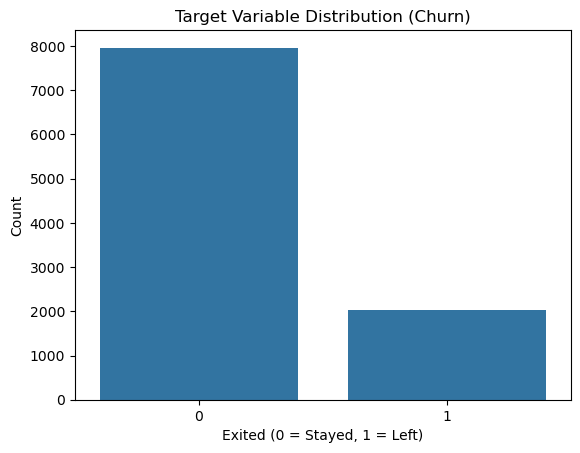

In [15]:
sns.countplot(x='Exited', data=df)
plt.title("Target Variable Distribution (Churn)")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

In [16]:
x=df.drop('Exited',axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### handling imbalaced data using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### splitting the dataset into training and testing data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

### feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train

array([[-0.0308795 , -0.39737166,  0.80630939, ..., -0.75968615,
         1.58785468,  0.80970398],
       [ 1.0947893 ,  0.10524092, -1.40130155, ..., -0.75968615,
        -0.62978056,  0.80970398],
       [ 0.31884284,  0.20576343, -1.40130155, ...,  1.31633306,
        -0.62978056,  0.80970398],
       ...,
       [ 0.19862579,  0.20576343,  1.17424455, ..., -0.75968615,
        -0.62978056,  0.80970398],
       [ 1.35708106,  1.11046607,  0.43837423, ...,  1.31633306,
        -0.62978056, -1.23501925],
       [ 0.52649049,  1.00994356, -1.40130155, ...,  1.31633306,
        -0.62978056,  0.80970398]])

### logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score
y_pred1 = model.predict(x_test)
accuracy_score(y_test, y_pred1)

0.775894538606403

In [55]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred1))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1633
           1       0.77      0.78      0.77      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))


Confusion Matrix:
 [[1263  370]
 [ 344 1209]]


### SVC

In [27]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [28]:
y_pred2 = model.predict(x_test)
accuracy_score(y_test, y_pred2)

0.8483992467043314

In [29]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1633
           1       0.85      0.84      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



### knn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred3 = model.predict(x_test)
accuracy_score(y_test, y_pred3)

0.8204645323289391

In [32]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred3))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1633
           1       0.81      0.83      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



### random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred4 = model.predict(x_test)
accuracy_score(y_test, y_pred4)

0.8760200878844947

In [35]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred4))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1633
           1       0.87      0.87      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



### decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred5 = model.predict(x_test)
accuracy_score(y_test, y_pred5)

0.8006905210295041

In [38]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred5))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1633
           1       0.78      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



### gradient boosting 

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [40]:
y_pred6 = model.predict(x_test)
accuracy_score(y_test, y_pred6)

0.8452605147520402

In [41]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred6))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1633
           1       0.84      0.84      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



### compare which model is best

In [42]:
final_df=pd.DataFrame({'Models':['LR','SVC','KNN','RF','DT','GB'],
                       'Accuracy':[accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4),
                                   accuracy_score(y_test, y_pred5),
                                   accuracy_score(y_test, y_pred6)]})

In [43]:
final_df

,Models,Accuracy
0,LR,0.775895
1,SVC,0.848399
2,KNN,0.820465
3,RF,0.871626
4,DT,0.800691
5,GB,0.845261


<Axes: xlabel='Models', ylabel='Accuracy'>

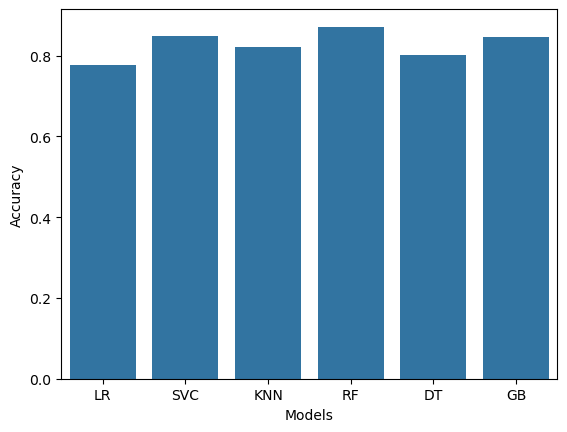

In [44]:
sns.barplot(x='Models', y='Accuracy', data=final_df)

In [45]:
df['Prediction'] = model.predict(scaler.transform(df.drop('Exited', axis=1)))

In [47]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Prediction
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,0
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,0
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,1
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,0
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,0
5,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True,1
6,822,50,7,0.00,2,1,1,10062.80,0,False,False,True,0
7,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False,1
8,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True,0
9,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True,0


### Identify key factors influencing customer churn


In [67]:
feature_importance = model.feature_importances_
features = x.columns

In [68]:
importance_df = pd.DataFrame({'Feature': features,
                              'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

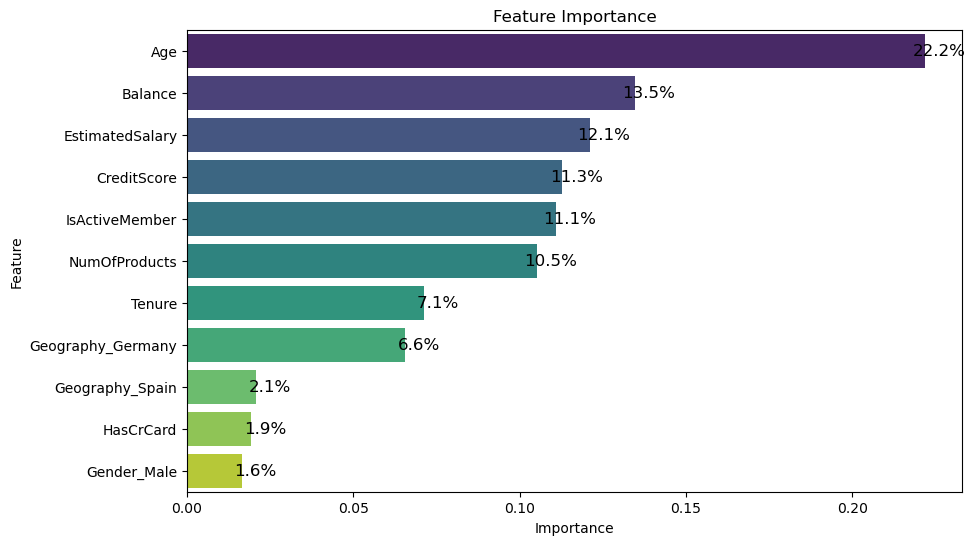

In [69]:
total_importance = importance_df['Importance'].sum()
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width/total_importance*100:.1f}%', 
                (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(10, 0), textcoords='offset points')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()